#Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

#Data Preprocessing

##Import Dataset

In [2]:
dataset = pd.read_csv('Final_App_Popularity_PK.csv')
X = dataset.iloc[:, 5:]
y = dataset.iloc[:, 4]

#Encoding Genre and Content Rating

In [3]:
categorical_data = ['genre', 'contentRating']

In [4]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
oh = OneHotEncoder()
ct = ColumnTransformer(transformers=[('encoder', oh, categorical_data)], remainder='passthrough')
X = np.array(ct.fit_transform(X))

#Splitting Training and Test Set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Random Forest Regression

In [6]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=200, random_state=42)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=200, random_state=42)

In [7]:
y_pred = regressor.predict(X_test)

In [8]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8905829122901527

In [9]:
fi = regressor.feature_importances_
genre = sum(fi[:48])
content_rating = sum(fi[48:53])

feature_importance = [genre, content_rating]
feature_importance.extend(fi[53:])

print(feature_importance[:4])

[0.2954191454118086, 0.03437118021379294, 0.1713954156040689, 0.01653293119971442]


In [10]:
X = dataset.iloc[:, 5:]

Text(0.5, 1.0, 'Main Characteristics Feature Importance - Pakistan')

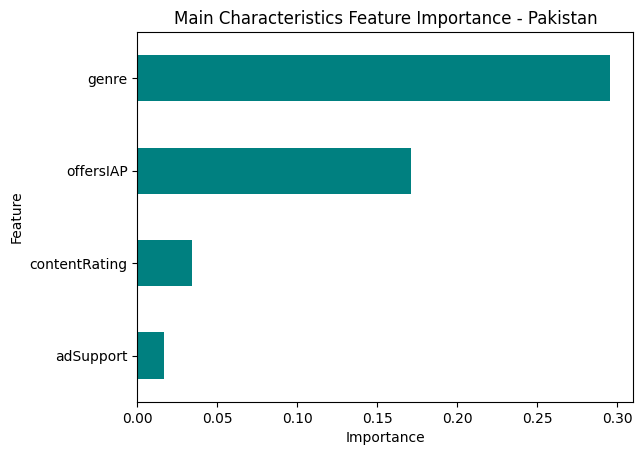

In [11]:
columns = ['genre', 'contentRating', 'offersIAP', 'adSupport']

global_importances = pd.Series(feature_importance[:4], index=columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='teal')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Main Characteristics Feature Importance - Pakistan")

Text(0.5, 1.0, 'Extra Characteristics Feature Importance')

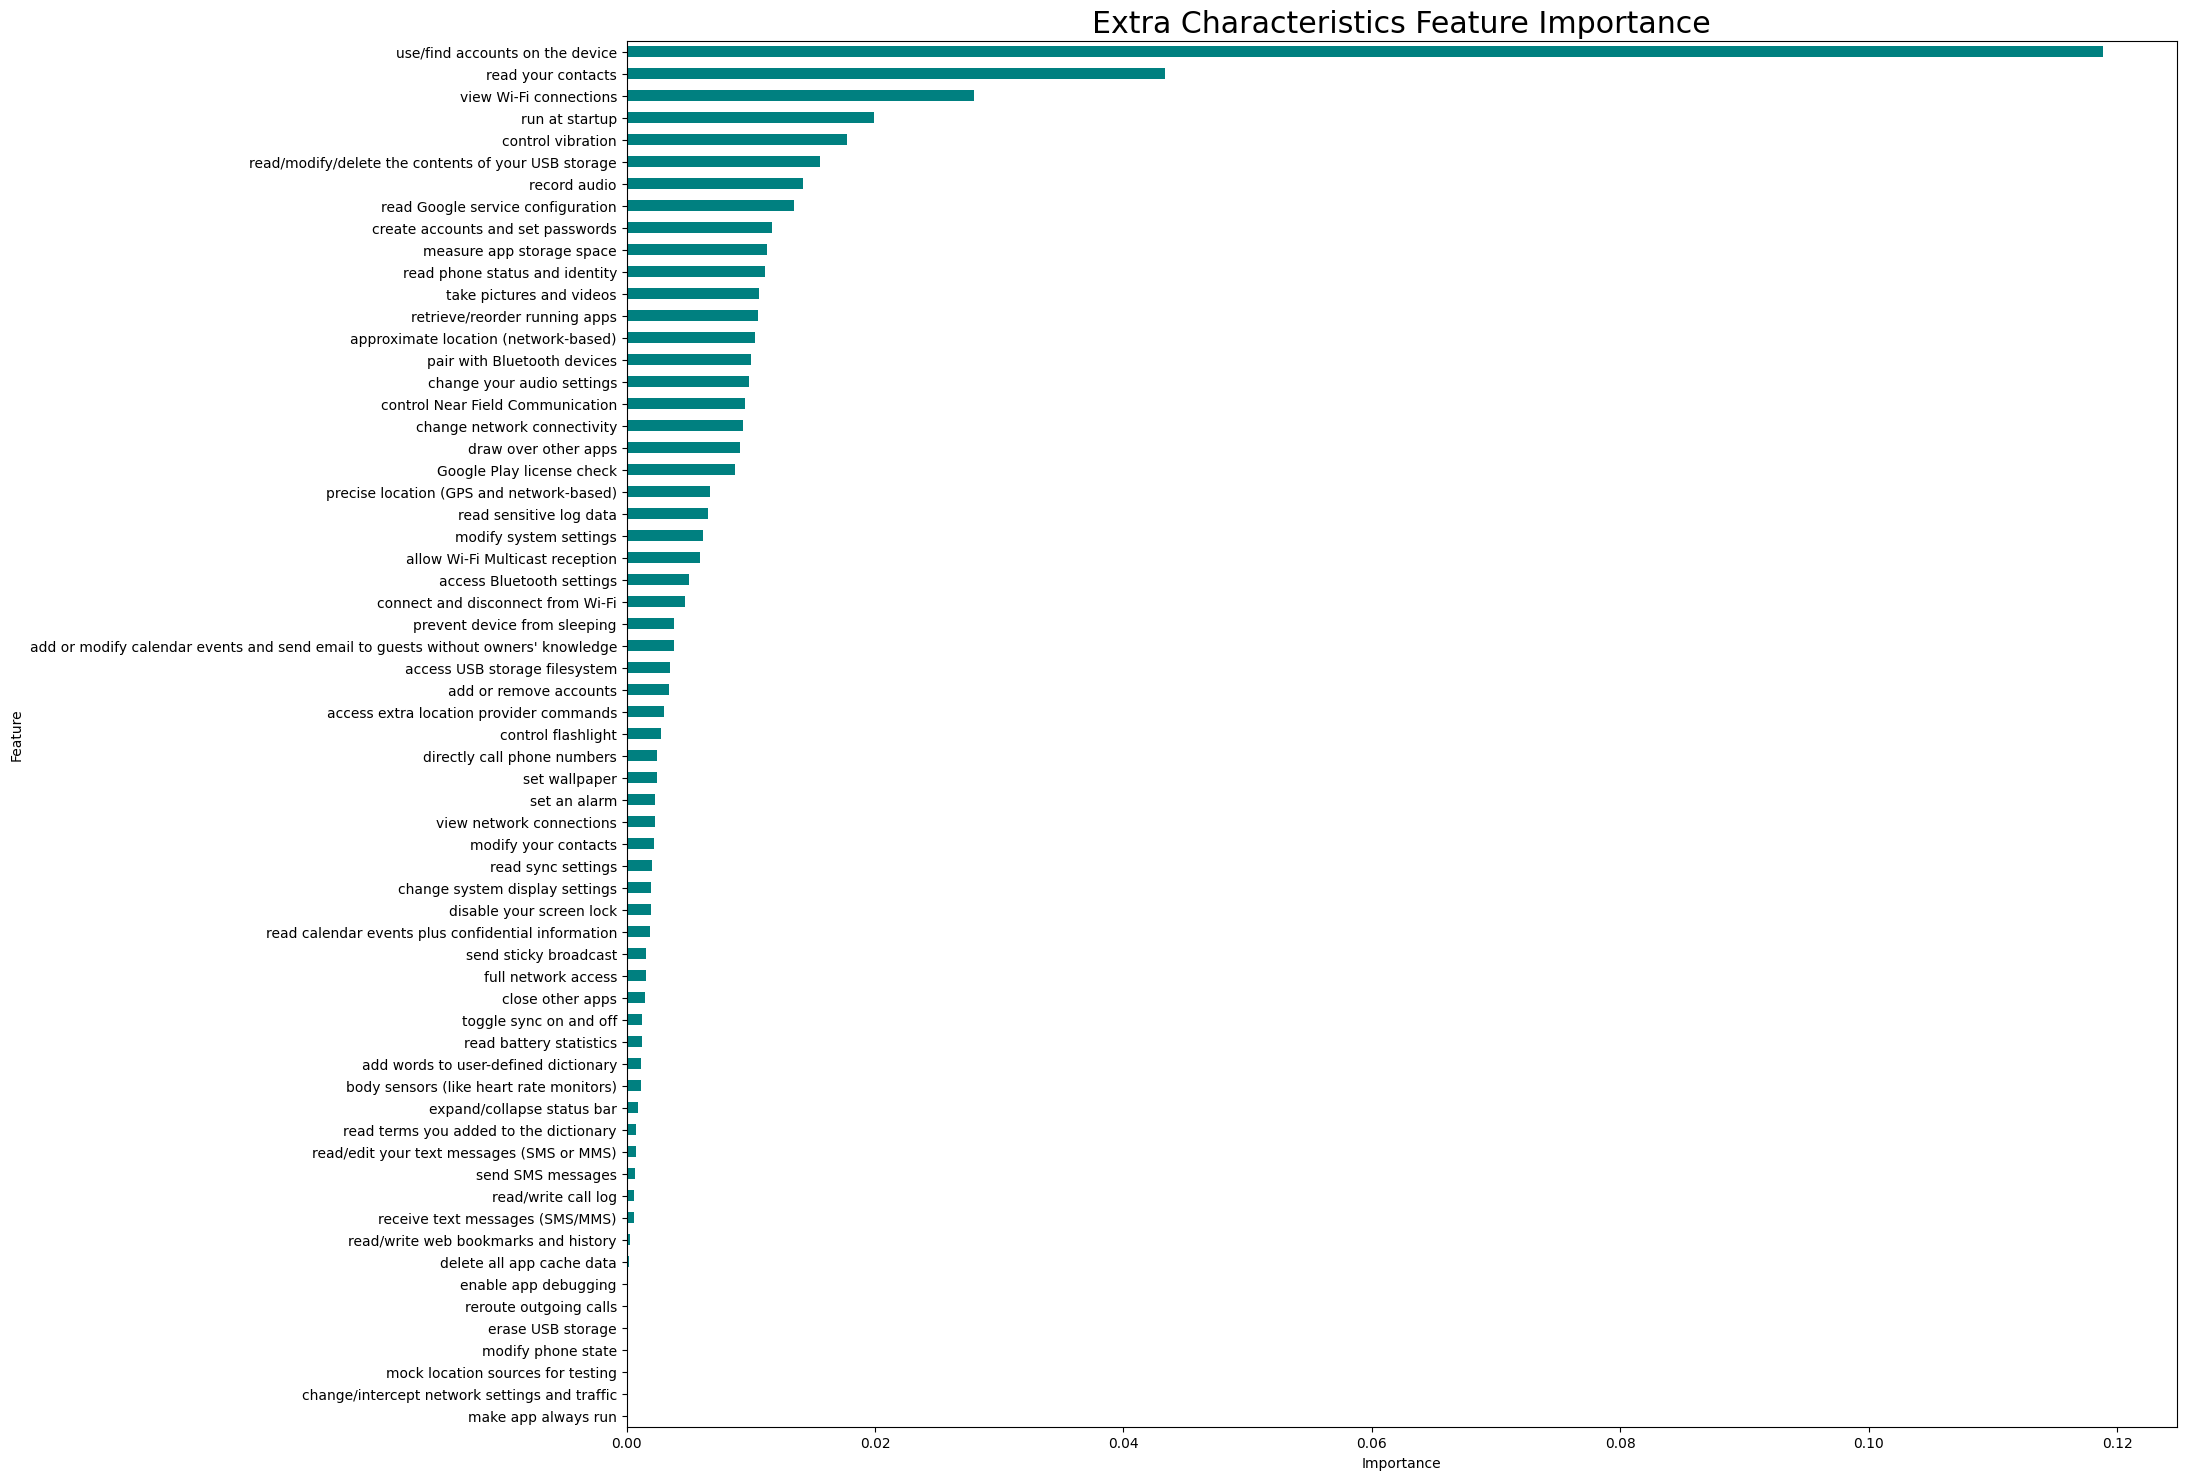

In [12]:
columns = X.columns[4:]

fig, ax = plt.subplots(figsize=(20, 18))
global_importances = pd.Series(feature_importance[4:], index=columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='teal')
plt.rcParams['font.size'] = 18
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Extra Characteristics Feature Importance")